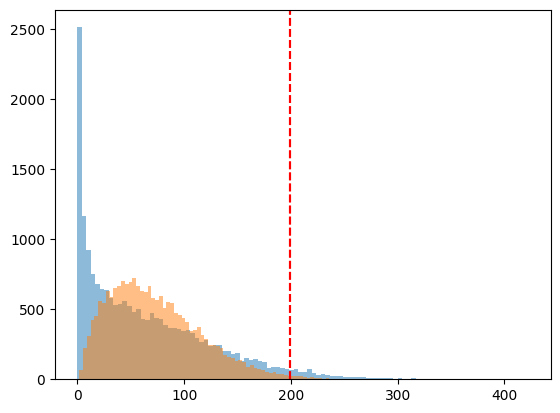

In [21]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
os.chdir('..')
from scripts.utils.utils_odfn import dict_variance,dict_variance_5_class

# random select 25 bounding boxes in range of (64,64)
boxes = []
for i in range(25):
    x = np.random.randint(0,64)
    y = np.random.randint(0,64)
    x_ = np.random.randint(0,64)
    y_ = np.random.randint(0,64)
    boxes.append([x+x_,y+y_])

boxes = np.array(boxes)/2
boxes = np.var(boxes,axis=0)
boxes = np.mean(boxes)

fig,ax = plt.subplots()
# plot a vertical line with the x value of boxes
ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance.values()), bins=100, label='variance',alpha=0.5)
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance_1.png')

# fig,ax = plt.subplots()
ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance_5_class.values()), bins=100, label='variance',alpha=0.5)
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance_2.png')

In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
os.chdir('..')
from scripts.utils.utils_odfn import dict_variance,dict_variance_5_class

# random select 25 bounding boxes in range of (64,64)
boxes = []
for i in range(25):
    x = np.random.randint(0,64)
    y = np.random.randint(0,64)
    x_ = np.random.randint(0,64)
    y_ = np.random.randint(0,64)
    boxes.append([x+x_,y+y_])

boxes = np.array(boxes)/2
boxes = np.var(boxes,axis=0)
boxes = np.mean(boxes)

fig,ax = plt.subplots(1,2,figsize=(10,5))
fig.tight_layout()
# plot a vertical line with the x value of boxes
ax[0].axvline(x=boxes, color='r', linestyle='--')
ax[1].hist(list(dict_variance.values()), bins=100, label='variance')

ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance_5_class.values()), bins=100, label='variance')
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance_2.png')

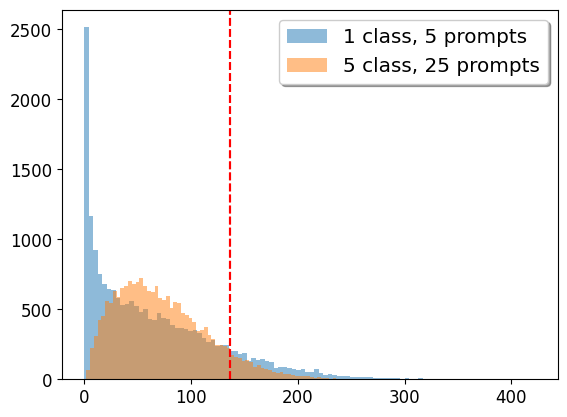

In [20]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
os.chdir('..')
from scripts.utils.utils_odfn import dict_variance,dict_variance_5_class

# random select 25 bounding boxes in range of (64,64)
boxes = []
for i in range(25):
    x = np.random.randint(0,64)
    y = np.random.randint(0,64)
    x_ = np.random.randint(0,64)
    y_ = np.random.randint(0,64)
    boxes.append([x+x_,y+y_])

boxes = np.array(boxes)/2
boxes = np.var(boxes,axis=0)
boxes = np.mean(boxes)

fig,ax = plt.subplots()
# plot a vertical line with the x value of boxes
ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance.values()), bins=100, label='1 class, 5 prompts',alpha=0.5)

# fig,ax = plt.subplots()
ax.axvline(x=boxes, color='r', linestyle='--')
ax.hist(list(dict_variance_5_class.values()), bins=100, label='5 class, 25 prompts',alpha=0.5)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
# set label font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
fig.savefig('/home/banyh2000/odfn/wrapup_data/variance.png')